In [1]:
import pandas as pd
import numpy as np
import datetime as DT
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_customer = pd.read_csv('AWCustomers.csv')
df_sale = pd.read_csv('AWSales.csv')

df_bike_test = pd.read_csv('AWTest-Classification.csv')
df_ave_test = pd.read_csv('AWTest-Regression.csv')

In [3]:
df_customer.head(5)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,...,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,...,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06
2,29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,...,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06
3,13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,...,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06
4,22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,...,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06


In [4]:
df_sale.head(5)

,CustomerID,BikeBuyer,AvgMonthSpend
0,21173,1,50.97
1,13249,1,53.11
2,29350,1,54.08
3,13503,1,56.93
4,22803,1,55.41


In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 24 columns):
CustomerID              18361 non-null int64
Title                   101 non-null object
FirstName               18361 non-null object
MiddleName              10572 non-null object
LastName                18361 non-null object
Suffix                  3 non-null object
AddressLine1            18361 non-null object
AddressLine2            311 non-null object
City                    18361 non-null object
StateProvinceName       18361 non-null object
CountryRegionName       18361 non-null object
PostalCode              18361 non-null object
PhoneNumber             18361 non-null object
BirthDate               18361 non-null object
Education               18361 non-null object
Occupation              18361 non-null object
Gender                  18361 non-null object
MaritalStatus           18361 non-null object
HomeOwnerFlag           18361 non-null int64
NumberCarsOwned         183

In [6]:
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18355 entries, 0 to 18354
Data columns (total 3 columns):
CustomerID       18355 non-null int64
BikeBuyer        18355 non-null int64
AvgMonthSpend    18355 non-null float64
dtypes: float64(1), int64(2)
memory usage: 430.3 KB


In [7]:
df_data = df_sale.merge(df_customer, how = 'right', left_on = 'CustomerID', right_on = 'CustomerID')

In [8]:
df_data.head(5)

,CustomerID,BikeBuyer,AvgMonthSpend,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
0,21173,1,50.97,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,...,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06
1,13249,1,53.11,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,...,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06
2,29350,1,54.08,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,...,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06
3,13503,1,56.93,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,...,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06
4,22803,1,55.41,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,...,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06


In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18361 entries, 0 to 18360
Data columns (total 26 columns):
CustomerID              18361 non-null int64
BikeBuyer               18361 non-null int64
AvgMonthSpend           18361 non-null float64
Title                   101 non-null object
FirstName               18361 non-null object
MiddleName              10572 non-null object
LastName                18361 non-null object
Suffix                  3 non-null object
AddressLine1            18361 non-null object
AddressLine2            311 non-null object
City                    18361 non-null object
StateProvinceName       18361 non-null object
CountryRegionName       18361 non-null object
PostalCode              18361 non-null object
PhoneNumber             18361 non-null object
BirthDate               18361 non-null object
Education               18361 non-null object
Occupation              18361 non-null object
Gender                  18361 non-null object
MaritalStatus           18

In [10]:
df_ave_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 24 columns):
CustomerID              25 non-null int64
Title                   0 non-null float64
FirstName               25 non-null object
MiddleName              19 non-null object
LastName                25 non-null object
Suffix                  0 non-null float64
AddressLine1            25 non-null object
AddressLine2            0 non-null float64
City                    25 non-null object
StateProvinceName       25 non-null object
CountryRegionName       25 non-null object
PostalCode              25 non-null object
PhoneNumber             25 non-null object
BirthDate               25 non-null object
Education               25 non-null object
Occupation              25 non-null object
Gender                  25 non-null object
MaritalStatus           25 non-null object
HomeOwnerFlag           25 non-null int64
NumberCarsOwned         25 non-null int64
NumberChildrenAtHome    25 non-null int6

In [11]:
df_data['BirthDate'] = pd.to_datetime(df_data['BirthDate'])
df_ave_test['BirthDate'] = pd.to_datetime(df_ave_test['BirthDate'])
df_bike_test['BirthDate'] = pd.to_datetime(df_bike_test['BirthDate'])
now = pd.Timestamp(DT.datetime.now())
df_data['Age'] = (now - df_data['BirthDate']).astype('<m8[Y]').astype('int')
df_ave_test['Age'] = (now - df_ave_test['BirthDate']).astype('<m8[Y]').astype('int')
df_bike_test['Age'] = (now - df_bike_test['BirthDate']).astype('<m8[Y]').astype('int')

df_data.drop(['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2', 'PostalCode', 'PhoneNumber', 
              'BirthDate', 'LastUpdated'], axis = 1, inplace = True)

df_ave_test.drop(['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2', 'PostalCode', 'PhoneNumber', 
              'BirthDate', 'LastUpdated'], axis = 1, inplace = True)

df_bike_test.drop(['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2', 'PostalCode', 'PhoneNumber', 
              'BirthDate', 'LastUpdated'], axis = 1, inplace = True)

In [12]:
df_ave_test.head(5)

,CustomerID,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,11908,South Melbourne,Victoria,Australia,Graduate Degree,Professional,M,S,1,2,0,0,135915,30
1,12286,Peterborough,England,United Kingdom,Graduate Degree,Professional,M,S,1,2,0,0,137732,27
2,12892,Royal Oak,British Columbia,Canada,Graduate Degree,Professional,M,M,1,2,0,0,135404,24
3,14698,Frankfurt am Main,Saarland,Germany,Bachelors,Management,F,M,1,3,0,0,104040,23
4,15085,Morangis,Essonne,France,Graduate Degree,Professional,F,S,1,0,0,0,129319,27


# Explore AvgMonthSpend and BikeBuyer

In [13]:
print('Minimum AvgMonthSpend: ' + str(df_data['AvgMonthSpend'].min()))
print('Maximum AvgMonthSpend: ' + str(df_data['AvgMonthSpend'].max()))
print('Mean AvgMonthSpend: ' + str(df_data['AvgMonthSpend'].mean()))
print('Median AvgMonthSpend: ' + str(df_data['AvgMonthSpend'].median()))
print('StDev AvgMonthSpend: ' + str(df_data['AvgMonthSpend'].std()))

Minimum AvgMonthSpend: 44.1
Maximum AvgMonthSpend: 65.29
Mean AvgMonthSpend: 51.766744186
Median AvgMonthSpend: 51.42
StDev AvgMonthSpend: 3.43768387955


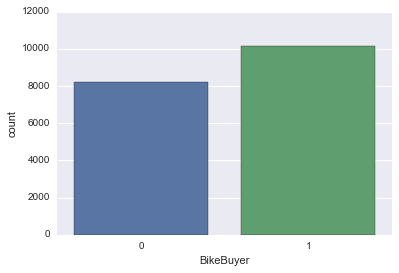

In [14]:
sns.countplot(x = 'BikeBuyer', data=df_data)

# Explore counts for Occupation, Gender, MaritalStatus and Education

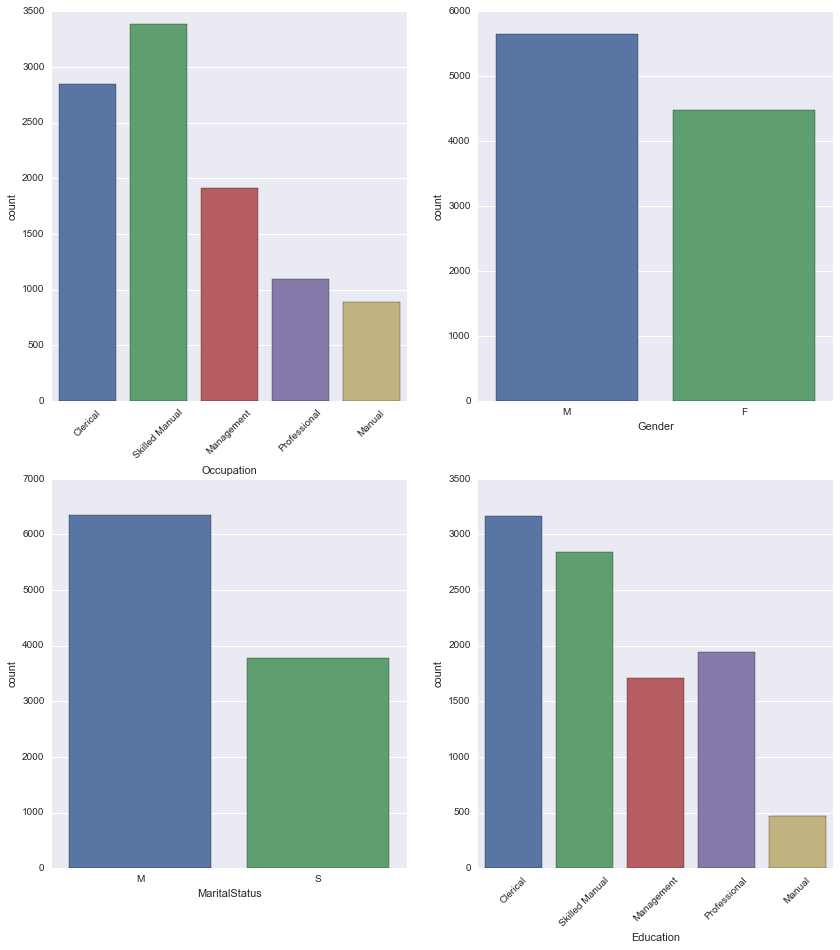

In [15]:
fig, axis = plt.subplots(2, 2, figsize = (14,14))
g1 = sns.countplot(x = 'Occupation', data=df_data[df_data['BikeBuyer'] == 1], ax = axis[0,0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
plt.gcf().subplots_adjust(bottom=0.05)
sns.countplot(x = 'Gender', data=df_data[df_data['BikeBuyer'] == 1], ax = axis[0,1])
sns.countplot(x = 'MaritalStatus', data=df_data[df_data['BikeBuyer'] == 1], ax = axis[1,0])
g2 = sns.countplot(x = 'Education', data=df_data[df_data['BikeBuyer'] == 1], ax = axis[1,1])
g2.set_xticklabels(g1.get_xticklabels(), rotation=45)

# Effect from Age

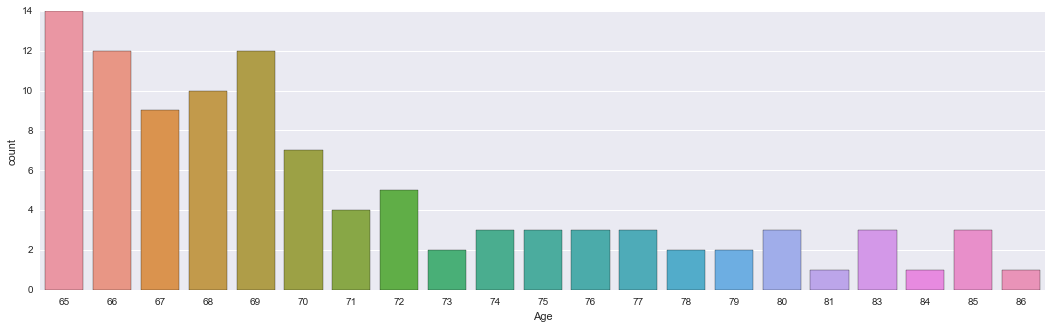

In [16]:
fig, axis = plt.subplots(1, 1, figsize = (18,5))
sns.countplot(x = 'Age', data=df_data[df_data['Age'] >= 65], ax = axis)

(40, 60)

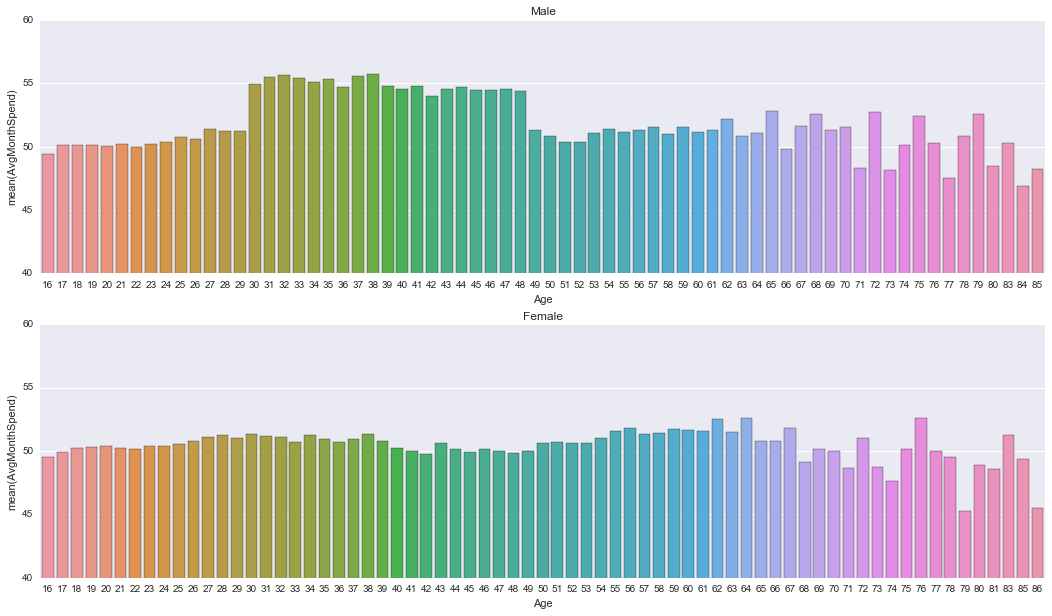

In [17]:
mean_male_Age = df_data[df_data['Gender'] == 'M'][['AvgMonthSpend', 'Age']].groupby(['Age'], as_index = False).mean()
mean_female_Age = df_data[df_data['Gender'] == 'F'][['AvgMonthSpend', 'Age']].groupby(['Age'], as_index = False).mean()
fig, (axis1, axis2) = plt.subplots(2, 1, figsize = (18,10))

fig1 = sns.barplot(x = 'Age', y = 'AvgMonthSpend', data=mean_male_Age, ax = axis1)
axis1.set_title('Male')
axis1.set_ylim([40, 60])

fig2 = sns.barplot(x = 'Age', y = 'AvgMonthSpend', data=mean_female_Age, ax = axis2)
axis2.set_title('Female')
axis2.set_ylim([40, 60])

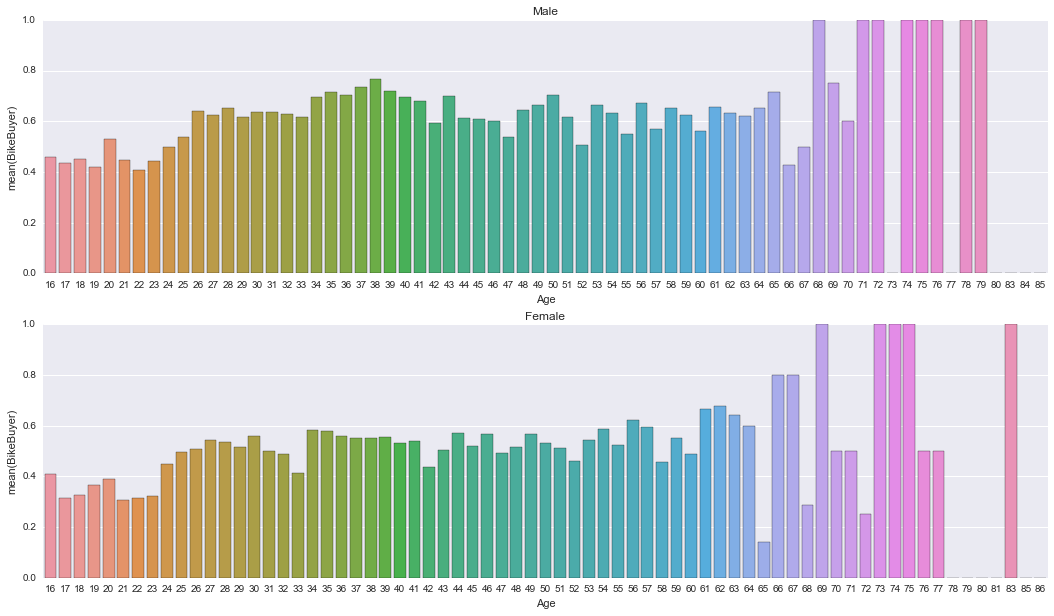

In [18]:
mean_male_Age_bike = df_data[df_data['Gender'] == 'M'][['BikeBuyer', 'Age']].groupby(['Age'], as_index = False).mean()
mean_female_Age_bike = df_data[df_data['Gender'] == 'F'][['BikeBuyer', 'Age']].groupby(['Age'], as_index = False).mean()
fig, (axis1, axis2) = plt.subplots(2, 1, figsize = (18,10))

fig1 = sns.barplot(x = 'Age', y = 'BikeBuyer', data=mean_male_Age_bike, ax = axis1)
axis1.set_title('Male')


fig2 = sns.barplot(x = 'Age', y = 'BikeBuyer', data=mean_female_Age_bike, ax = axis2)
axis2.set_title('Female')


# Effect from Occupation on AvgMonthSpend and BikeBuyer

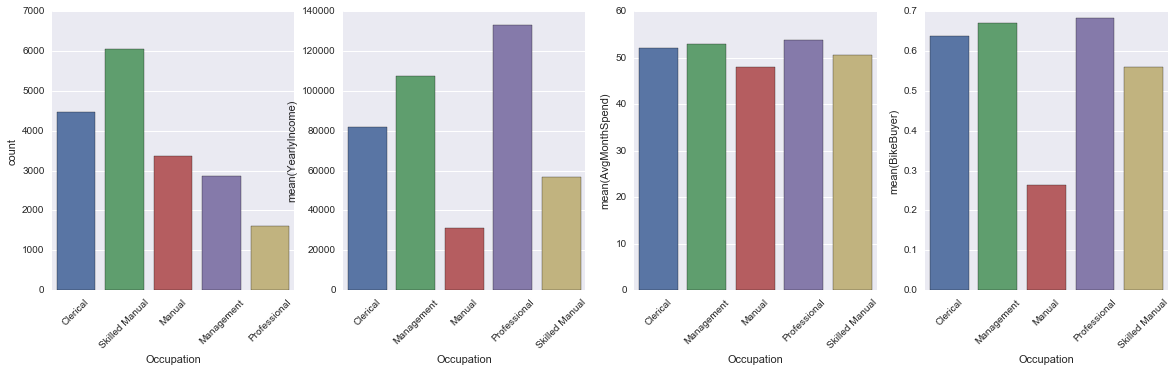

In [19]:
median_YearlyIncome = df_data[['YearlyIncome', 'Occupation']].groupby(['Occupation'], as_index = False).median()
median_AvgMonthSpend = df_data[['AvgMonthSpend', 'Occupation']].groupby(['Occupation'], as_index = False).median()
median_bike = df_data[['BikeBuyer', 'Occupation']].groupby(['Occupation'], as_index = False).mean()

fig, axis = plt.subplots(1,4, figsize = (20,5))
fig1 = sns.countplot(x = 'Occupation', data=df_data, ax=axis[0])
fig2 = sns.barplot(x = 'Occupation', y = 'YearlyIncome', data=median_YearlyIncome, ax = axis[1])
fig3 = sns.barplot(x = 'Occupation', y = 'AvgMonthSpend', data=median_AvgMonthSpend, ax = axis[2])
fig4 = sns.barplot(x = 'Occupation', y = 'BikeBuyer', data=median_bike, ax = axis[3])

fig1.set_xticklabels(fig1.get_xticklabels(), rotation=45)
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=45)
fig3.set_xticklabels(fig3.get_xticklabels(), rotation=45)
fig4.set_xticklabels(fig4.get_xticklabels(), rotation=45)

# Effect from Education on AvgMonthSpend and BikeBuyer

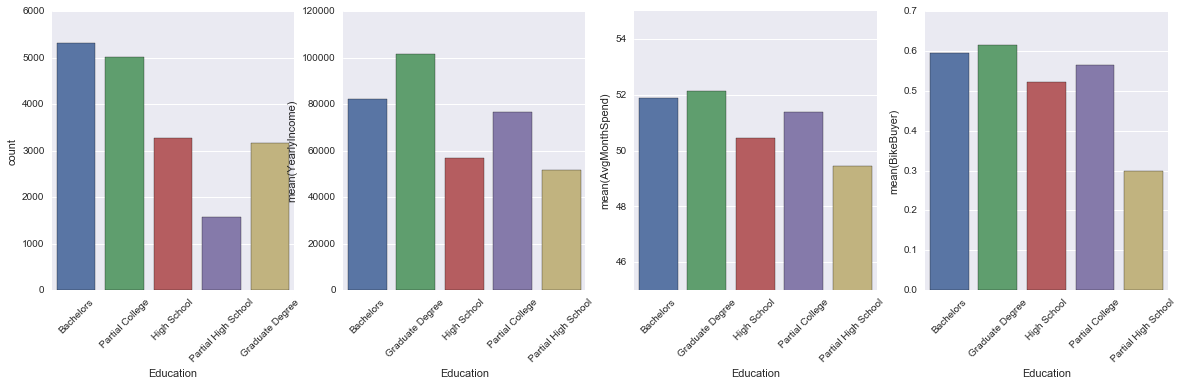

In [20]:
median_YearlyIncome_edu = df_data[['YearlyIncome', 'Education']].groupby(['Education'], as_index = False).median()
median_AvgMonthSpend_edu = df_data[['AvgMonthSpend', 'Education']].groupby(['Education'], as_index = False).median()
mean_bike_edu = df_data[['BikeBuyer', 'Education']].groupby(['Education'], as_index = False).mean()

fig, axis = plt.subplots(1,4, figsize = (20,5))

fig1 = sns.countplot(x = 'Education', data=df_data, ax=axis[0])
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=45)

fig2 = sns.barplot(x = 'Education', y = 'YearlyIncome', data=median_YearlyIncome_edu, ax = axis[1])
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=45)

fig3 = sns.barplot(x = 'Education', y = 'AvgMonthSpend', data=median_AvgMonthSpend_edu, ax = axis[2])
fig3.set_xticklabels(fig3.get_xticklabels(), rotation=45)
fig3.set_ylim([45, 55])

fig4 = sns.barplot(x = 'Education', y = 'BikeBuyer', data=mean_bike_edu, ax = axis[3])
fig4.set_xticklabels(fig4.get_xticklabels(), rotation=45)


# YearlyIncome vs. AvgMonthSpend

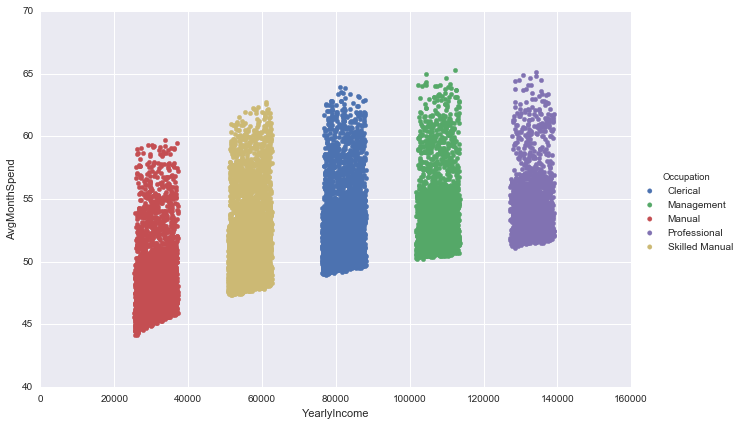

In [21]:
occupation_list = np.unique(df_data['Occupation'].tolist())
fg = sns.FacetGrid(data=df_data, hue='Occupation', hue_order=occupation_list, size = 6, aspect=1.5)
fg.map(plt.scatter, 'YearlyIncome', 'AvgMonthSpend').add_legend()
plt.rcParams['figure.figsize']=(10,10)

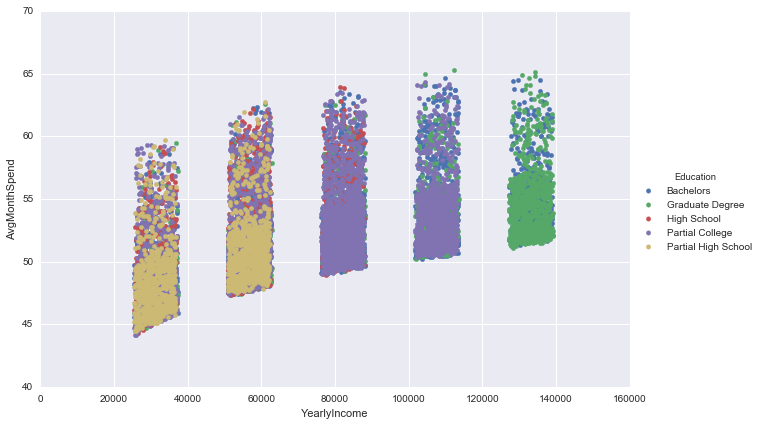

In [22]:
Education_list = np.unique(df_data['Education'].tolist())
fg = sns.FacetGrid(data=df_data, hue='Education', hue_order=Education_list, size = 6, aspect=1.5)
fg.map(plt.scatter, 'YearlyIncome', 'AvgMonthSpend').add_legend()
plt.rcParams['figure.figsize']=(10,10)

# Effect from MaritalStatus, NumberCarsOwned, Gender, NumberChildrenAtHome and TotalChildren on AvgMonthSpend

(50, 53)

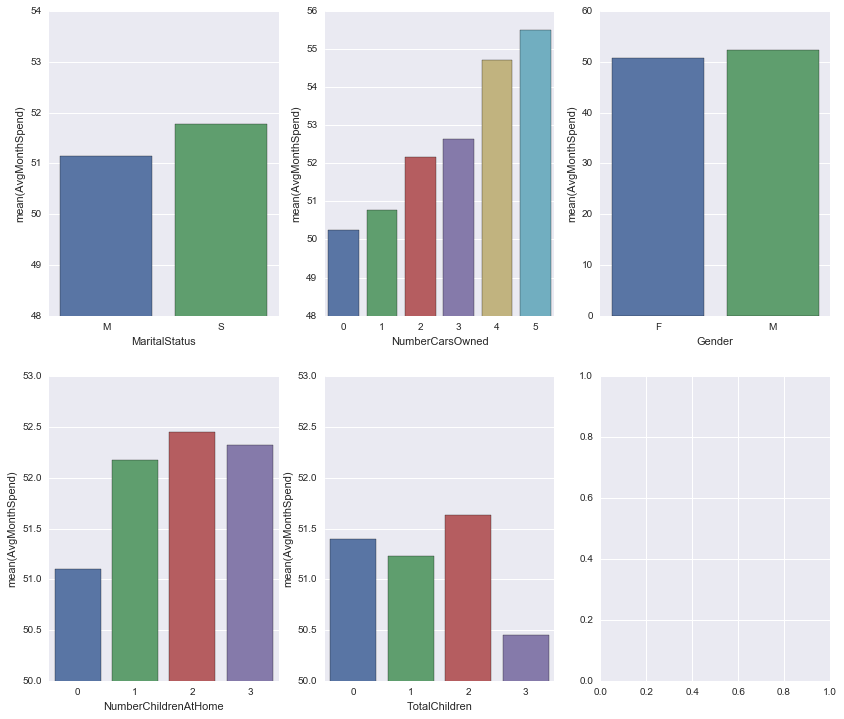

In [23]:
median_marriage = df_data[['AvgMonthSpend', 'MaritalStatus']].groupby(['MaritalStatus'], as_index = False).median()
median_car = df_data[['AvgMonthSpend', 'NumberCarsOwned']].groupby(['NumberCarsOwned'], as_index = False).median()
median_gender = df_data[['AvgMonthSpend', 'Gender']].groupby(['Gender'], as_index = False).median()
median_child = df_data[['AvgMonthSpend', 'NumberChildrenAtHome']].groupby(['NumberChildrenAtHome'], as_index = False).median()
median_child_all = df_data[['AvgMonthSpend', 'TotalChildren']].groupby(['TotalChildren'], as_index = False).median()
fig, axis = plt.subplots(2, 3, figsize = (14,12))

fig1 = sns.barplot(x = 'MaritalStatus', y = 'AvgMonthSpend', data = median_marriage, ax = axis[0,0])
axis[0,0].set_ylim([48, 54])
fig2 = sns.barplot(x = 'NumberCarsOwned', y = 'AvgMonthSpend', data = median_car, ax = axis[0,1])
axis[0,1].set_ylim([48, 56])
fig3 = sns.barplot(x = 'Gender', y = 'AvgMonthSpend', data = median_gender, ax = axis[0,2])
axis[1,0].set_ylim([50, 53])
fig4 = sns.barplot(x = 'NumberChildrenAtHome', y = 'AvgMonthSpend', data = median_child, ax = axis[1,0])
axis[1,1].set_ylim([50, 53])
fig5 = sns.barplot(x = 'TotalChildren', y = 'AvgMonthSpend', data = median_child_all, ax = axis[1,1])
axis[1,1].set_ylim([50, 53])

# Effect from MaritalStatus, NumberCarsOwned, Gender and NumberChildrenAtHome on BikeBuyer

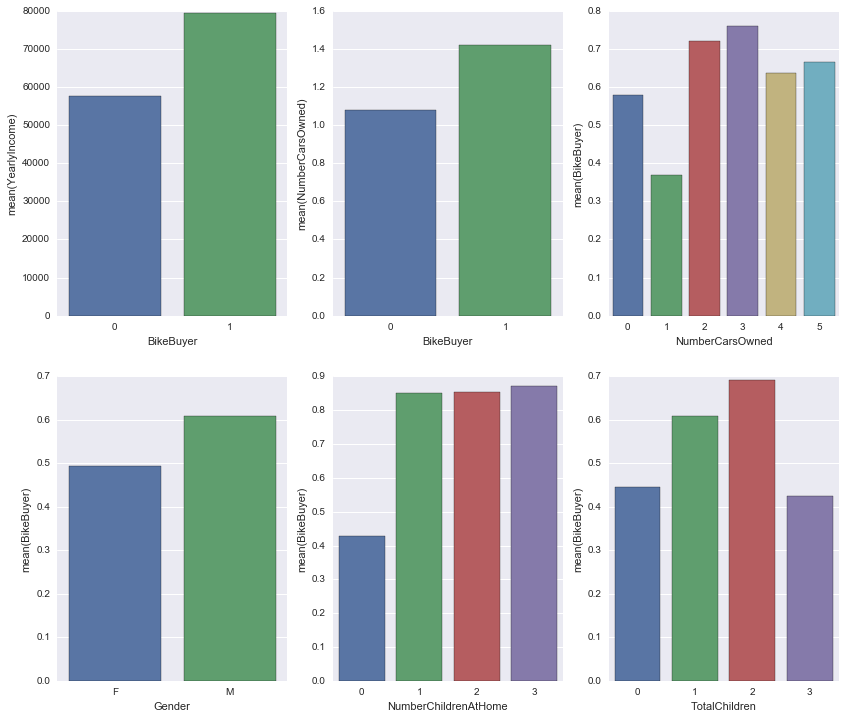

In [24]:
median_marriage_bike = df_data[['YearlyIncome', 'BikeBuyer']].groupby(['BikeBuyer'], as_index = False).median()
mean_car_bike = df_data[['NumberCarsOwned', 'BikeBuyer']].groupby(['BikeBuyer'], as_index = False).mean()
mean_car_bike2 = df_data[['NumberCarsOwned', 'BikeBuyer']].groupby(['NumberCarsOwned'], as_index = False).mean()
median_child_bike = df_data[['BikeBuyer', 'NumberChildrenAtHome']].groupby(['NumberChildrenAtHome'], as_index = False).mean()
median_child_all_bike = df_data[['BikeBuyer', 'TotalChildren']].groupby(['TotalChildren'], as_index = False).mean()
median_gender_bike = df_data[['BikeBuyer', 'Gender']].groupby(['Gender'], as_index = False).mean()
fig, axis = plt.subplots(2, 3, figsize = (14,12))

fig1 = sns.barplot(x = 'BikeBuyer', y = 'YearlyIncome', data = median_marriage_bike, ax = axis[0,0])
fig2 = sns.barplot(x = 'BikeBuyer', y = 'NumberCarsOwned', data = mean_car_bike, ax = axis[0,1])
fig3 = sns.barplot(x = 'NumberCarsOwned', y = 'BikeBuyer', data = mean_car_bike2, ax = axis[0,2])
fig4 = sns.barplot(x = 'Gender', y = 'BikeBuyer', data = median_gender_bike, ax = axis[1,0])
fig5 = sns.barplot(x = 'NumberChildrenAtHome', y = 'BikeBuyer', data = median_child_bike, ax = axis[1,1])
fig6 = sns.barplot(x = 'TotalChildren', y = 'BikeBuyer', data = median_child_all_bike, ax = axis[1,2])

# Explore region effect

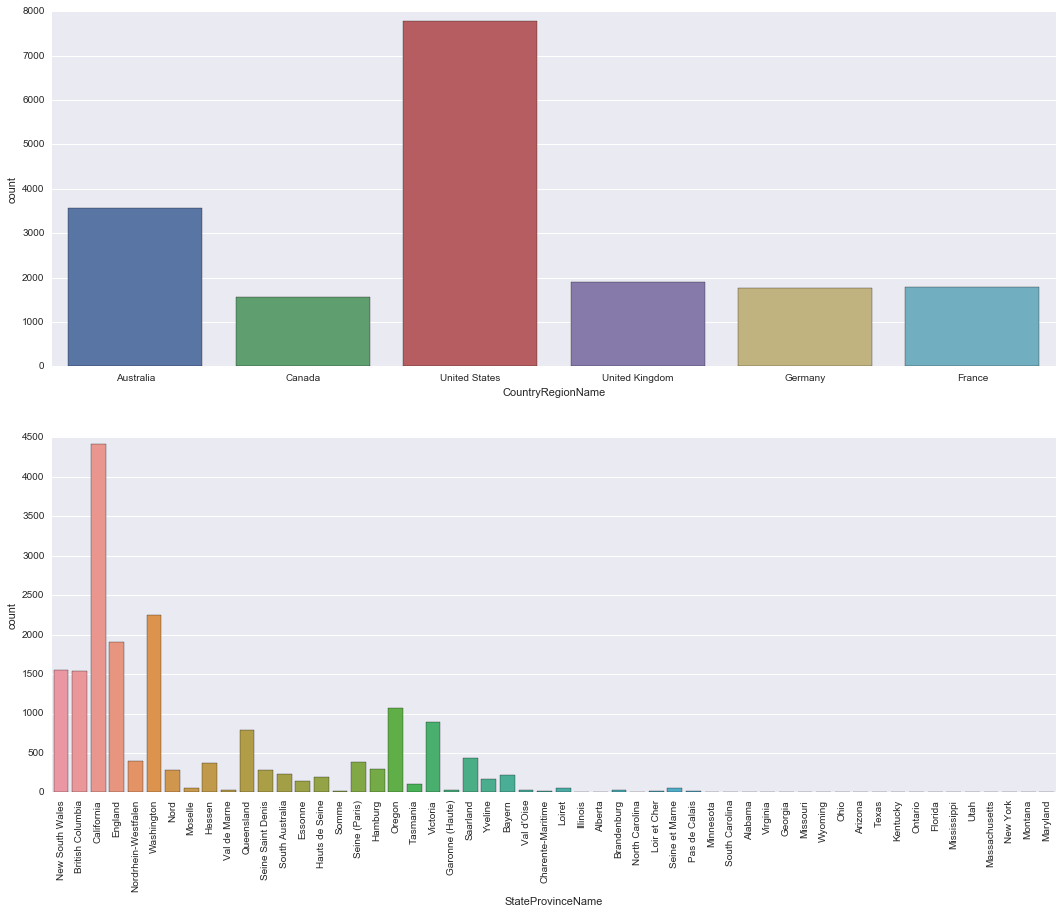

In [25]:
fig, axis = plt.subplots(2, 1, figsize = (18,14))
fig1 = sns.countplot(x = 'CountryRegionName', data = df_data, ax = axis[0])
fig2 = sns.countplot(x = 'StateProvinceName', data = df_data, ax = axis[1])
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=90)

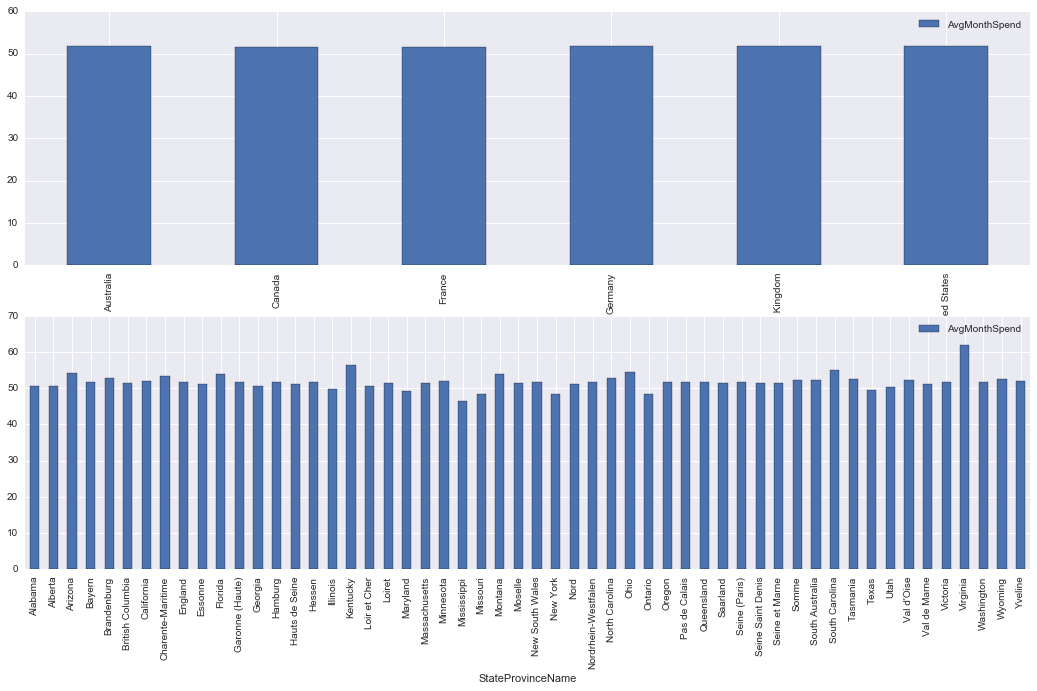

In [26]:
mean_country_ave = df_data[['AvgMonthSpend', 'CountryRegionName']].groupby(['CountryRegionName'], as_index = False).mean()
mean_region_ave = df_data[['AvgMonthSpend', 'StateProvinceName']].groupby(['StateProvinceName'], as_index = False).mean()

fig, axis = plt.subplots(2, 1, figsize = (18,10))
mean_country_ave.plot.bar(x = 'CountryRegionName', y = 'AvgMonthSpend', ax = axis[0])
mean_region_ave.plot.bar(x = 'StateProvinceName', y = 'AvgMonthSpend', ax = axis[1])

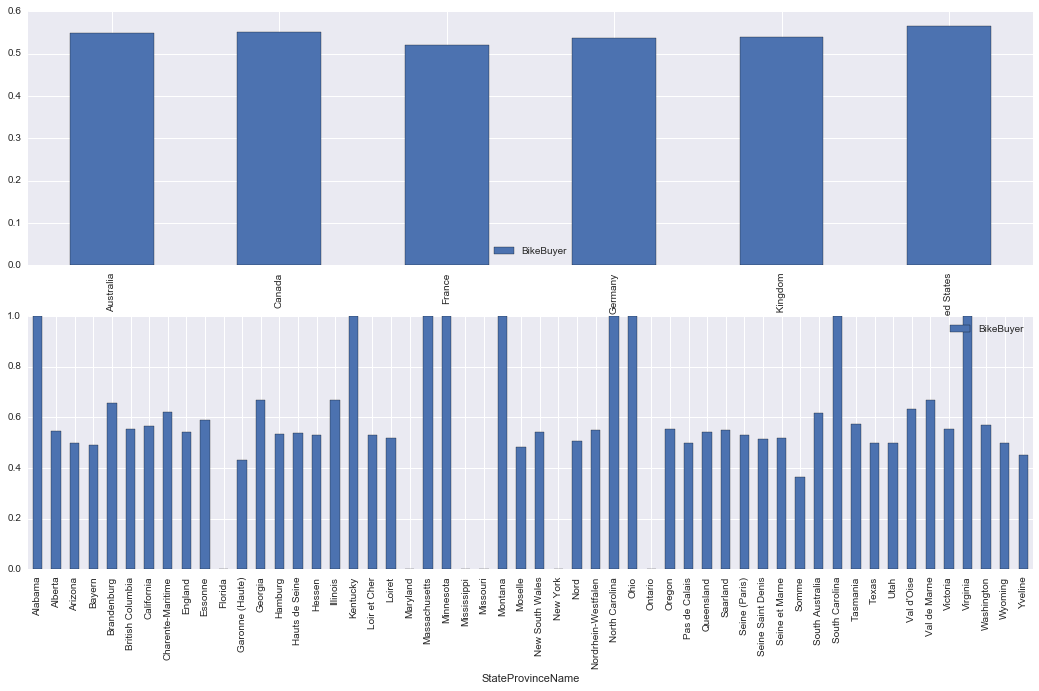

In [27]:
mean_country_bike = df_data[['BikeBuyer', 'CountryRegionName']].groupby(['CountryRegionName'], as_index = False).mean()
mean_region_bike = df_data[['BikeBuyer', 'StateProvinceName']].groupby(['StateProvinceName'], as_index = False).mean()

fig, axis = plt.subplots(2, 1, figsize = (18,10))
mean_country_bike.plot.bar(x = 'CountryRegionName', y = 'BikeBuyer', ax = axis[0])
mean_region_bike.plot.bar(x = 'StateProvinceName', y = 'BikeBuyer', ax = axis[1])

In [28]:
def bike_state(data):
    if data in ['Alabama', 'Kentucky', 'Massachusetts', 'Minnesota', 'Montana', 'North Carolina', 'South Carolina', 'Virginia']:
        return 1
    else:
        return 0

def ebuy_state(data):
    if data == 'Virginia':
        return 1
    else:
        return 0
    
df_data['Bike State'] = 'TBD'
df_data['Ebuy State'] = 'TBD'
df_data['Bike State'] = df_data['StateProvinceName'].apply(bike_state)
df_data['Ebuy State'] = df_data['StateProvinceName'].apply(ebuy_state)

df_data.drop(['City', 'StateProvinceName', 'CountryRegionName'], axis = 1, inplace = True)

df_bike_test['Bike State'] = 'TBD'
df_bike_test['Ebuy State'] = 'TBD'
df_bike_test['Bike State'] = df_bike_test['StateProvinceName'].apply(bike_state)
df_bike_test['Ebuy State'] = df_bike_test['StateProvinceName'].apply(ebuy_state)

df_bike_test.drop(['City', 'StateProvinceName', 'CountryRegionName'], axis = 1, inplace = True)

df_ave_test['Bike State'] = 'TBD'
df_ave_test['Ebuy State'] = 'TBD'
df_ave_test['Bike State'] = df_ave_test['StateProvinceName'].apply(bike_state)
df_ave_test['Ebuy State'] = df_ave_test['StateProvinceName'].apply(ebuy_state)

df_ave_test.drop(['City', 'StateProvinceName', 'CountryRegionName'], axis = 1, inplace = True)

df_data.head(5)

,CustomerID,BikeBuyer,AvgMonthSpend,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,Bike State,Ebuy State
0,21173,1,50.97,Bachelors,Clerical,M,M,1,3,0,1,81916,29,0,0
1,13249,1,53.11,Partial College,Clerical,M,M,1,2,1,2,81076,44,0,0
2,29350,1,54.08,Bachelors,Clerical,F,S,0,3,0,0,86387,31,0,0
3,13503,1,56.93,Partial College,Skilled Manual,M,M,1,2,1,2,61481,39,0,0
4,22803,1,55.41,Partial College,Skilled Manual,M,S,1,1,0,0,51804,42,0,0


In [29]:
def set_sex(data):
    if data == 'M':
        return 'Male'
    else:
        return 'Female'
    
def set_youth(data):
    sex,age = data
    if age <= 23:
        return 'Youth'
    else:
        return sex
    
df_data['Gender'] = df_data['Gender'].apply(set_sex)
df_data['Gender'] = df_data[['Gender', 'Age']].apply(set_youth, axis=1)

df_data_occupation = pd.get_dummies(df_data['Occupation'])
df_data = df_data.merge(df_data_occupation, left_index = True, right_index = True)

df_data_education = pd.get_dummies(df_data['Education'])
df_data = df_data.merge(df_data_education, left_index = True, right_index = True)

df_data_gender = pd.get_dummies(df_data['Gender'])
df_data = df_data.merge(df_data_gender, left_index = True, right_index = True)

df_data_maritalstatus = pd.get_dummies(df_data['MaritalStatus'])
df_data = df_data.merge(df_data_maritalstatus, left_index = True, right_index = True)

df_data.head(5)

,CustomerID,BikeBuyer,AvgMonthSpend,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,...,Bachelors,Graduate Degree,High School,Partial College,Partial High School,Female,Male,Youth,M,S
0,21173,1,50.97,Bachelors,Clerical,Male,M,1,3,0,...,1,0,0,0,0,0,1,0,1,0
1,13249,1,53.11,Partial College,Clerical,Male,M,1,2,1,...,0,0,0,1,0,0,1,0,1,0
2,29350,1,54.08,Bachelors,Clerical,Female,S,0,3,0,...,1,0,0,0,0,1,0,0,0,1
3,13503,1,56.93,Partial College,Skilled Manual,Male,M,1,2,1,...,0,0,0,1,0,0,1,0,1,0
4,22803,1,55.41,Partial College,Skilled Manual,Male,S,1,1,0,...,0,0,0,1,0,0,1,0,0,1


In [30]:
def set_sex(data):
    if data == 'M':
        return 'Male'
    else:
        return 'Female'

def set_youth(data):
    sex,age = data
    if age <= 23:
        return 'Youth'
    else:
        return sex
    
df_bike_test['Gender'] = df_bike_test['Gender'].apply(set_sex)
df_bike_test['Gender'] = df_bike_test[['Gender', 'Age']].apply(set_youth, axis=1)
df_ave_test['Gender'] = df_ave_test['Gender'].apply(set_sex)
df_ave_test['Gender'] = df_ave_test[['Gender', 'Age']].apply(set_youth, axis=1)

df_bike_test_occupation = pd.get_dummies(df_bike_test['Occupation'])
df_bike_test = df_bike_test.merge(df_bike_test_occupation, left_index = True, right_index = True)
df_ave_test_occupation = pd.get_dummies(df_ave_test['Occupation'])
df_ave_test = df_ave_test.merge(df_ave_test_occupation, left_index = True, right_index = True)

df_bike_test_education = pd.get_dummies(df_bike_test['Education'])
df_bike_test = df_bike_test.merge(df_bike_test_education, left_index = True, right_index = True)
df_ave_test_education = pd.get_dummies(df_ave_test['Education'])
df_ave_test = df_ave_test.merge(df_ave_test_education, left_index = True, right_index = True)

df_bike_test_gender = pd.get_dummies(df_bike_test['Gender'])
df_bike_test = df_bike_test.merge(df_bike_test_gender, left_index = True, right_index = True)
df_ave_test_gender = pd.get_dummies(df_ave_test['Gender'])
df_ave_test = df_ave_test.merge(df_ave_test_gender, left_index = True, right_index = True)

df_bike_test_maritalstatus = pd.get_dummies(df_bike_test['MaritalStatus'])
df_bike_test = df_bike_test.merge(df_bike_test_maritalstatus, left_index = True, right_index = True)
df_ave_test_maritalstatus = pd.get_dummies(df_ave_test['MaritalStatus'])
df_ave_test = df_ave_test.merge(df_ave_test_maritalstatus, left_index = True, right_index = True)


df_bike_test.head(10)

,CustomerID,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,...,Bachelors,Graduate Degree,High School,Partial College,Partial High School,Female,Male,Youth,M,S
0,11219,High School,Skilled Manual,Male,M,1,2,2,2,56100,...,0,0,1,0,0,0,1,0,1,0
1,11241,Partial College,Skilled Manual,Female,S,1,0,0,0,61555,...,0,0,0,1,0,1,0,0,0,1
2,11352,Partial College,Clerical,Male,M,1,3,0,2,83613,...,0,0,0,1,0,0,1,0,1,0
3,11904,Graduate Degree,Professional,Female,S,1,2,0,0,130551,...,0,1,0,0,0,1,0,0,0,1
4,11908,Graduate Degree,Professional,Male,S,1,2,0,0,135915,...,0,1,0,0,0,0,1,0,0,1
5,12113,High School,Clerical,Male,M,1,3,1,2,78868,...,0,0,1,0,0,0,1,0,1,0
6,12221,Graduate Degree,Clerical,Female,M,1,2,0,2,78234,...,0,1,0,0,0,1,0,0,1,0
7,12286,Graduate Degree,Professional,Male,S,1,2,0,0,137732,...,0,1,0,0,0,0,1,0,0,1
8,12292,Bachelors,Skilled Manual,Male,M,1,1,0,2,59959,...,1,0,0,0,0,0,1,0,1,0
9,12305,Partial College,Clerical,Male,M,1,0,1,2,79735,...,0,0,0,1,0,0,1,0,1,0


In [31]:
df_data.drop(['CustomerID', 'Education', 'Occupation', 'Gender', 'MaritalStatus'], axis = 1, inplace = True)
df_bike_test.drop(['Education', 'Occupation', 'Gender', 'MaritalStatus'], axis = 1, inplace = True)
df_ave_test.drop(['Education', 'Occupation', 'Gender', 'MaritalStatus'], axis = 1, inplace = True)
df_bike_test.head(5)

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,Bike State,Ebuy State,Clerical,...,Bachelors,Graduate Degree,High School,Partial College,Partial High School,Female,Male,Youth,M,S
0,11219,1,2,2,2,56100,46,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,11241,1,0,0,0,61555,39,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,11352,1,3,0,2,83613,57,0,0,1,...,0,0,0,1,0,0,1,0,1,0
3,11904,1,2,0,0,130551,27,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,11908,1,2,0,0,135915,30,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [32]:
df_ave_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 23 columns):
CustomerID              25 non-null int64
HomeOwnerFlag           25 non-null int64
NumberCarsOwned         25 non-null int64
NumberChildrenAtHome    25 non-null int64
TotalChildren           25 non-null int64
YearlyIncome            25 non-null int64
Age                     25 non-null int32
Bike State              25 non-null int64
Ebuy State              25 non-null int64
Clerical                25 non-null uint8
Management              25 non-null uint8
Manual                  25 non-null uint8
Professional            25 non-null uint8
Skilled Manual          25 non-null uint8
Bachelors               25 non-null uint8
Graduate Degree         25 non-null uint8
High School             25 non-null uint8
Partial College         25 non-null uint8
Female                  25 non-null uint8
Male                    25 non-null uint8
Youth                   25 non-null uint8
M              

In [33]:
df_bike_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 24 columns):
CustomerID              50 non-null int64
HomeOwnerFlag           50 non-null int64
NumberCarsOwned         50 non-null int64
NumberChildrenAtHome    50 non-null int64
TotalChildren           50 non-null int64
YearlyIncome            50 non-null int64
Age                     50 non-null int32
Bike State              50 non-null int64
Ebuy State              50 non-null int64
Clerical                50 non-null uint8
Management              50 non-null uint8
Manual                  50 non-null uint8
Professional            50 non-null uint8
Skilled Manual          50 non-null uint8
Bachelors               50 non-null uint8
Graduate Degree         50 non-null uint8
High School             50 non-null uint8
Partial College         50 non-null uint8
Partial High School     50 non-null uint8
Female                  50 non-null uint8
Male                    50 non-null uint8
Youth          

In [35]:
bike_train_x = df_data.drop(['AvgMonthSpend', 'BikeBuyer'], axis = 1)
bike_train_y = df_data['BikeBuyer']
ave_train_x = df_data.drop(['AvgMonthSpend', 'BikeBuyer'], axis = 1)
ave_train_y = df_data['AvgMonthSpend']

bike_test_x = df_bike_test.drop('CustomerID', axis = 1)
ave_test_x = df_ave_test.drop('CustomerID', axis = 1)
ave_test_x['Partial High School'] = 0

In [35]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(bike_train_x, bike_train_y)
prediction_dt = decision_tree.predict(bike_test_x)

acc_decision_tree = round(decision_tree.score(bike_train_x, bike_train_y) * 100, 2)
acc_decision_tree

99.95

In [36]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(random_forest, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(bike_train_x, bike_train_y)

# Set the clf to the best combination of parameters
random_forest = grid_obj.best_estimator_

random_forest.fit(bike_train_x, bike_train_y)
prediction_rf = random_forest.predict(bike_test_x)

acc_random_forest = round(random_forest.score(bike_train_x, bike_train_y) * 100, 2)
acc_random_forest

79.66

In [54]:
from sklearn.linear_model import Lars
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import GridSearchCV

en = Lars()
parameters = {'n_nonzero_coefs': [1, 3, 5, 7, np.inf], 
              'fit_intercept': [True, False],
              'precompute': ['auto'], 
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(en, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(ave_train_x, ave_train_y)

# Set the clf to the best combination of parameters
en = grid_obj.best_estimator_

en.fit(ave_train_x, ave_train_y)
prediction_en = en.predict(ave_test_x)


E:\Program Files\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.452e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.825e-08
  ConvergenceWarning)
E:\Program Files\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:377: RuntimeWarning: overflow encountered in divide
  g1 = arrayfuncs.min_pos((C - Cov) / (AA - corr_eq_dir + tiny))
E:\Program Files\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 10 iterations, i.e. alpha=8.137e-04, with an active set of 10 regressors, and the smallest cholesky pivot element being 1.825e-08
  ConvergenceWarning)
E:\Program Files\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regr

In [37]:
ave_test_x.shape

(25, 23)

In [55]:
submission = pd.DataFrame({
        "CustomerID": df_ave_test["CustomerID"],
        "AvgMonthSpend": prediction_en
    })
submission.to_csv('submission.csv', index=False)